In [1]:
# @title 必要なライブラリインストール. 実行後再起動してください
!pip install -q transformers accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 838.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.7 MB/s eta 0:00:00


# GPT-4o

In [2]:
!pip install -U openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.9/680.9 kB 39.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.78.0
    Uninstalling openai-1.78.0:
      Successfully uninstalled openai-1.78.0


In [3]:
# @title openaiキーの設定
import os
from google.colab import userdata

openai_api_key = userdata.get('OPENAI_API_KEY')
os.environ['OPENAI_API_KEY'] = openai_api_key

In [4]:
# @title 質問と画像をリクエストする関数
import base64
from openai import OpenAI

client = OpenAI()

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

def ask_v_question(question, image_url, max_tokens=256):
    response = client.chat.completions.create(
      model="gpt-4o",
      messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": question},
            {
              "type": "image_url",
              "image_url": {
                "url": image_url,
              },
            },
          ],
        }
      ],
      max_tokens=max_tokens,
    )

    return response.choices[0].message.content

## 質問１

Saving iStock-1087578026.jpg to iStock-1087578026.jpg


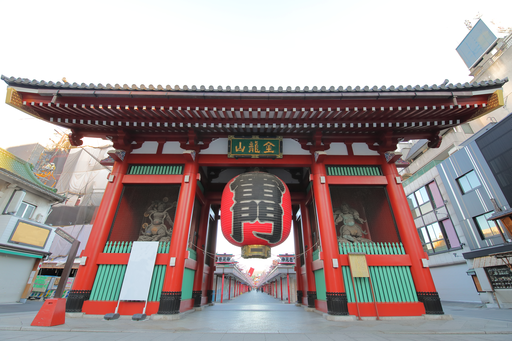

In [5]:
from google.colab import files
from PIL import Image
from io import BytesIO
from IPython.display import display

# 画像をアップロード（ダイアログが開く）
uploaded = files.upload()

# 最初にアップロードされた画像を読み込む
kaminarimon_filename = next(iter(uploaded))          # 1 枚だけ扱う場合
kaminarimon_image    = Image.open(BytesIO(uploaded[kaminarimon_filename]))

# 画像が大きすぎる場合はリサイズ. アスペクト比を固定して横幅512にリサイズ
w_percent = 512 / float(kaminarimon_image.size[0])
h_size = int(float(kaminarimon_image.size[1]) * w_percent)
kaminarimon_image = kaminarimon_image.resize((512, h_size), Image.LANCZOS)
kaminarimon_image.save(kaminarimon_filename)

# プレビュー表示
display(kaminarimon_image)

In [6]:
base64_image = encode_image(kaminarimon_filename)
image_url = f"data:image/jpeg;base64,{base64_image}"
response = ask_v_question("どこの写真ですか？", image_url)
print(response)

これは日本の東京にある浅草寺の雷門です。


## 質問2

https://i.ibb.co/6XbhMzS/ui-scribble.jpg

![title](https://i.ibb.co/6XbhMzS/ui-scribble.jpg)

In [7]:
screenshot_img_url = "https://i.ibb.co/6XbhMzS/ui-scribble.jpg"

response = ask_v_question("このUIをHTMLコードで作成してください。", screenshot_img_url, max_tokens=512)

print(response)

こちらは、シンプルなUIデザインの画像ですね。このデザインに基づいて、HTMLコードを作成します。以下のコードを参考にしてください。

```html
<!DOCTYPE html>
<html lang="ja">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>ホゲホゲ</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            font-family: Arial, sans-serif;
        }
        .container {
            text-align: center;
            border: 1px solid #000;
            padding: 20px;
            box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
        }
        .content-box {
            border: 1px solid #000;
            padding: 10px;
            margin: 20px 0;
        }
        .nav-buttons {
            display: flex;
            justify-content: center;
            margin-bottom: 20px;
        }
        .nav-buttons button {
            margin: 0 10px;
            padding: 5px 10px;
     

In [8]:
from IPython.core.display import display, HTML
display(HTML(response.split("```")[1]))

## 質問3

Saving iStock-531464670.jpg to iStock-531464670.jpg


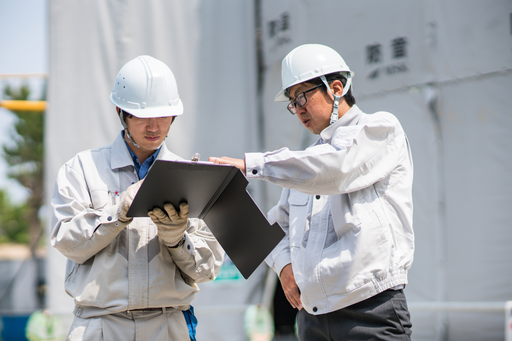

In [9]:
# 画像をアップロード（ダイアログが開く）
uploaded = files.upload()

# 最初にアップロードされた画像を読み込む
construction_filename = next(iter(uploaded))          # 1 枚だけ扱う場合
construction_image    = Image.open(BytesIO(uploaded[construction_filename]))

# 画像が大きすぎる場合はリサイズ. アスペクト比を固定して横幅512にリサイズ
w_percent = 512 / float(construction_image.size[0])
h_size = int(float(construction_image.size[1]) * w_percent)
construction_image = construction_image.resize((512, h_size), Image.LANCZOS)
construction_image.save(construction_filename)

# プレビュー表示
display(construction_image)

In [10]:
construction_base64_image = encode_image(construction_filename)
construction_image_url = f"data:image/jpeg;base64,{construction_base64_image}"

response = ask_v_question("この写真にはヘルメットの何個が写っていますか？", construction_image_url, max_tokens=512)

print(response)

写真にはヘルメットが2個写っています。


In [11]:
prompt = """Which of the following labels is most appropriate to classify this image?
Candidates: construction site, roadwork, warehouse, office meeting, airport
Answer with only the label name: """

response = ask_v_question(prompt, construction_image_url, max_tokens=16)

print(response)

construction site


# CLIP (画像分類)

In [12]:
from PIL import Image
import requests

from transformers import pipeline

In [13]:
# @title モデルのロードとzeroshot分類のパイプライン定義

checkpoint = "openai/clip-vit-large-patch14"
detector = pipeline(model=checkpoint, task="zero-shot-image-classification")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


In [14]:
# @title 分類の候補となるラベルを指定
candidate_labels = ["construction site", "roadwork", "warehouse", "office meeting", "airport"]

In [15]:
# @title 分類結果の確認
predictions = detector(construction_image, candidate_labels=candidate_labels)
print(predictions)

[{'score': 0.9513612389564514, 'label': 'construction site'}, {'score': 0.02586262673139572, 'label': 'office meeting'}, {'score': 0.020175399258732796, 'label': 'warehouse'}, {'score': 0.0016518435440957546, 'label': 'roadwork'}, {'score': 0.0009489576332271099, 'label': 'airport'}]


In [16]:
# @title 候補ラベルを自然な文に拡張

# 各ラベルに対応する自然な文章
labels = [
    "a construction project",
    "road construction work",
    "warehouse operations",
    "an office meeting",
    "airport maintenance",
]

# プロンプトを生成
def get_prompt(label):
    return f"They are working on {label} in this image."

prompts = [get_prompt(label) for label in labels]
# 推論（注意：detectorには「文章化したprompts」を渡す）
predictions = detector(construction_image, candidate_labels=prompts)
# 結果表示
print(predictions)

[{'score': 0.5698782801628113, 'label': 'They are working on a construction project in this image.'}, {'score': 0.32845544815063477, 'label': 'They are working on warehouse operations in this image.'}, {'score': 0.053068242967128754, 'label': 'They are working on airport maintenance in this image.'}, {'score': 0.04005197435617447, 'label': 'They are working on an office meeting in this image.'}, {'score': 0.008546152152121067, 'label': 'They are working on road construction work in this image.'}]


# XCLIP

In [17]:
# @title 動画読み込みのためのライブラリインストール
!pip install decord

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 102.3 MB/s eta 0:00:00


In [18]:
# @title 必要なライブラリの読み込み
from decord import VideoReader, cpu
import numpy as np
from PIL import Image
import torch
from transformers import XCLIPProcessor, XCLIPModel

In [19]:
# @title モデルの読み込み

model_name = "microsoft/xclip-base-patch32"
processor = XCLIPProcessor.from_pretrained(model_name)
model = XCLIPModel.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/309 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/965 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/786M [00:00<?, ?B/s]

In [20]:
# @title 動画のアップロード

uploaded = files.upload()
for file_name in uploaded:
    file_path = file_name
print(file_path)

Saving 動作解析・ヒューマンセンシングAIご紹介動画（株式会社LightblueTechnology）【フルバージョン】 [u2s7YdQ7Gzs].mp4 to 動作解析・ヒューマンセンシングAIご紹介動画（株式会社LightblueTechnology）【フルバージョン】 [u2s7YdQ7Gzs].mp4
動作解析・ヒューマンセンシングAIご紹介動画（株式会社LightblueTechnology）【フルバージョン】 [u2s7YdQ7Gzs].mp4


(8, 360, 640, 3)


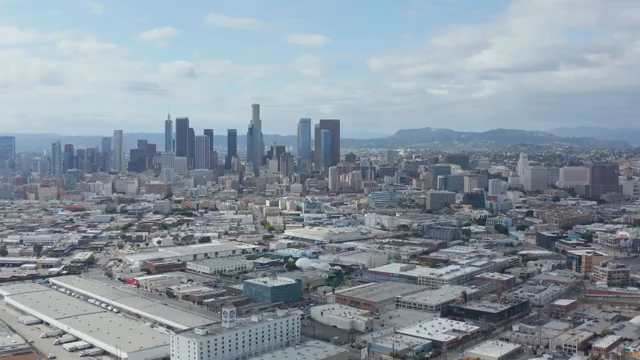

In [21]:
# @title 動画から画像をサンプリングして入力を作成

videoreader = VideoReader(file_path, num_threads=1, ctx=cpu(0))

# sample 8 frames
unit_frame = 10
videoreader.seek(30)
indices = np.arange(0, 8 * unit_frame, unit_frame)
video = videoreader.get_batch(indices).asnumpy()
print(video.shape)

Image.fromarray(video[0])

In [22]:
# @title 分類する候補を入力
candidate_labels = ["programming course", "eating spaghetti", "working in a logistics warehouse"]

In [23]:
# @title 推論実施
inputs = processor(text=candidate_labels, videos=list(video), return_tensors="pt", padding=True)

# forward pass
with torch.no_grad():
    outputs = model(**inputs)

probs = outputs.logits_per_video.softmax(dim=1)
probs

/usr/local/lib/python3.11/dist-packages/transformers/image_processing_utils.py:42: UserWarning: The following named arguments are not valid for `VideoMAEImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


tensor([[0.0054, 0.0032, 0.9915]])

# BLIP (画像に対して質問応答）

In [24]:
import torch
import requests
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration, BitsAndBytesConfig

In [25]:
# @title モデルの読み込み
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", load_in_4bit=True, device_map="auto")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/122k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [26]:
# @title 画像のパスと質問に対して回答する関数
import torch
from PIL import Image
from io import BytesIO
import requests

# ----------------------------------------------------------------------
# Step 1 : 画像を取得（URL かローカルパスを自動判定して読み込む）
# ----------------------------------------------------------------------
def load_image(path_or_url):
    """URL またはローカルパスから RGB 画像を PIL.Image で返す"""
    if path_or_url.startswith(("http://", "https://")):
        resp = requests.get(path_or_url, timeout=10)
        resp.raise_for_status()
        return Image.open(BytesIO(resp.content)).convert("RGB")
    return Image.open(path_or_url).convert("RGB")

# ----------------------------------------------------------------------
# Step 2 : 前処理（Processor でテンソル化し GPU / CPU へ転送）
# Step 3 : 推論（generate で回答トークン列を生成）
# Step 4 : 後処理（デコードして文字列へ変換）
# ----------------------------------------------------------------------
def blip2_answer(image_path, question,
                 model, processor,
                 dtype=torch.float16, device=None):
    """
    画像と質問文から BLIP-2 の回答テキストを返す。
      image_path: 画像ファイルのパスまたは URL
      question  : 'Question: ... Answer:' 形式のプロンプト
    """
    # Step 2 ------------------------------------------------------------
    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    image  = load_image(image_path)
    inputs = processor(image, question, return_tensors="pt").to(device, dtype)

    # Step 3 ------------------------------------------------------------
    with torch.inference_mode():
        output_ids = model.generate(**inputs, max_length=64)

    # Step 4 ------------------------------------------------------------
    return processor.decode(output_ids[0], skip_special_tokens=True).strip()

In [27]:
question = "Question: how many people are in the picture? Answer:"
blip2_answer(construction_filename, question, model, processor)

/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:451: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


'Question: how many people are in the picture? Answer: two'

In [28]:
question = "Question: Where are the people in this picture? Answer:"
blip2_answer(construction_filename, question, model, processor)

'Question: Where are the people in this picture? Answer: they are working on a construction site'

# GroundingSAM

In [29]:
%cd /content

/content


In [30]:
# @title GroundingDINOのインストール
%%bash

cd /content
git clone "https://github.com/IDEA-Research/GroundingDINO.git"
cd /content/GroundingDINO/groundingdino/models/GroundingDINO/csrc/MsDeformAttn
# バージョンに伴うインストールエラーの修正
sed -i 's/value.type()/value.scalar_type()/g' ms_deform_attn_cuda.cu
sed -i 's/value.scalar_type().is_cuda()/value.is_cuda()/g' ms_deform_attn_cuda.cu
cd /content/GroundingDINO
git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
pip install -q .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 15.9 MB/s eta 0:00:00


Cloning into 'GroundingDINO'...


In [31]:
# @title モデルのダウンロード
%%bash

cd /content
mkdir -p weights
cd weights
wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

pip uninstall -y supervision
pip install -q roboflow supervision==0.6.0

Found existing installation: supervision 0.4.0
Uninstalling supervision-0.4.0:
  Successfully uninstalled supervision-0.4.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.1 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.6.0 which is incompatible.


In [32]:
import os
from typing import List

import cv2
from google.colab.patches import cv2_imshow
import supervision as sv
import torch

from groundingdino.util.inference import Model

/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [33]:
# @title モデルのロード

GROUNDING_DINO_CONFIG_PATH = os.path.join("/content", "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))
GROUNDING_DINO_CHECKPOINT_PATH = os.path.join("/content", "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))
grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True
/content/weights/groundingdino_swint_ogc.pth ; exist: True
final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

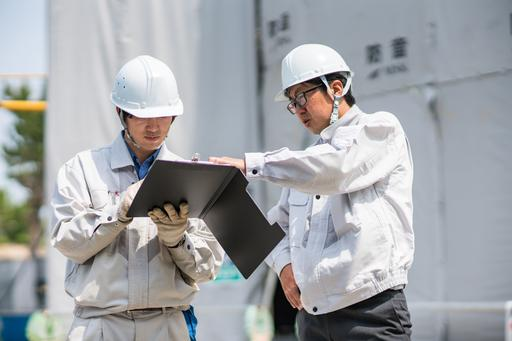

In [34]:
# @title 画像の読み込み
construction_filename = "/content/iStock-531464670.jpg"
image = cv2.imread(construction_filename)
cv2_imshow(image)

In [35]:
# @title 推論の設定

BOX_THRESHOLD = 0.35
TEXT_THRESHOLD = 0.25
CLASSES = ["helmet", "person", "tape measure"]
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def enhance_class_name(class_names: List[str]) -> List[str]:
    return [
        f"all {class_name}s"
        for class_name
        in class_names
    ]

In [36]:
# @title 推論実行
detections = grounding_dino_model.predict_with_classes(
    image=image,
    classes=enhance_class_name(class_names=CLASSES),
    box_threshold=BOX_THRESHOLD,
    text_threshold=TEXT_THRESHOLD
)

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1575: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/groundingdino/models/GroundingDINO/transformer.py:862: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `

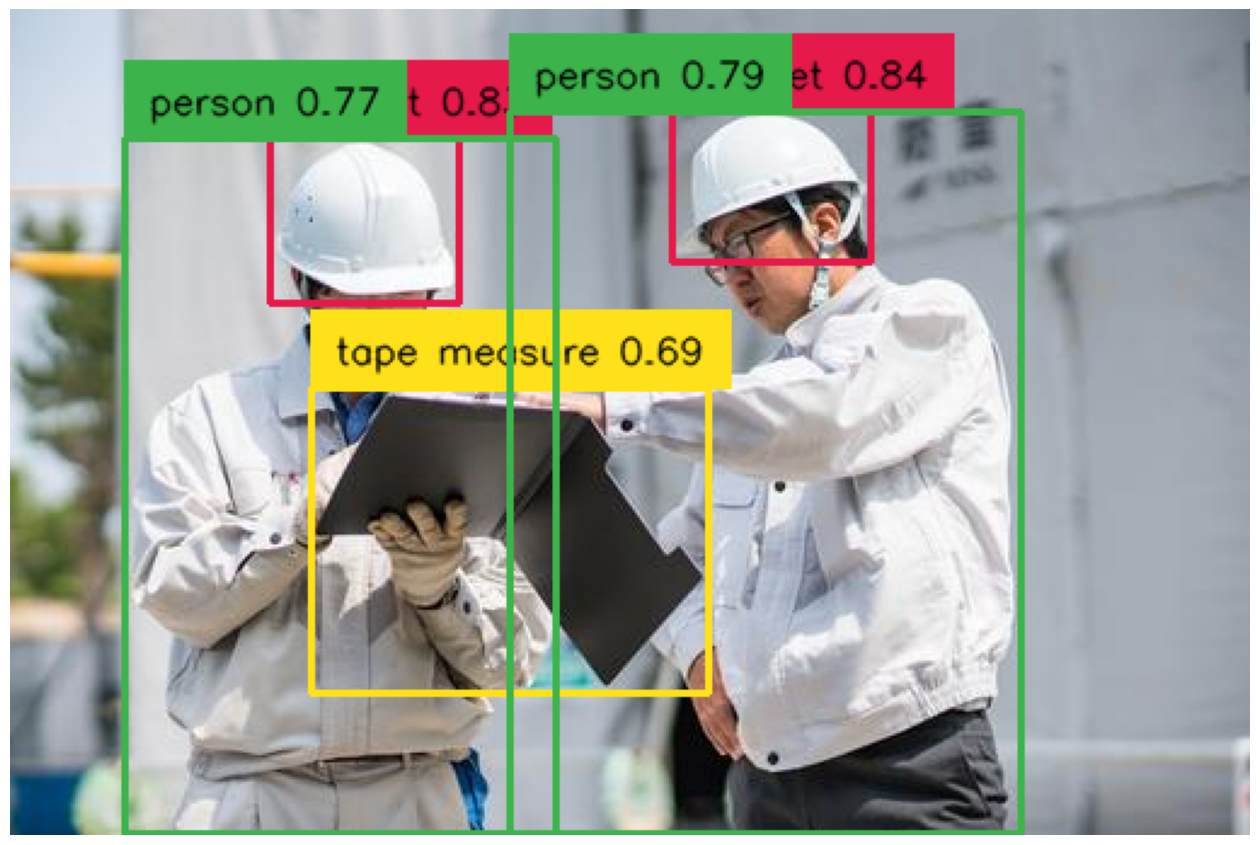

In [37]:
# @title 推論結果を画像に描画
box_annotator = sv.BoxAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)]
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

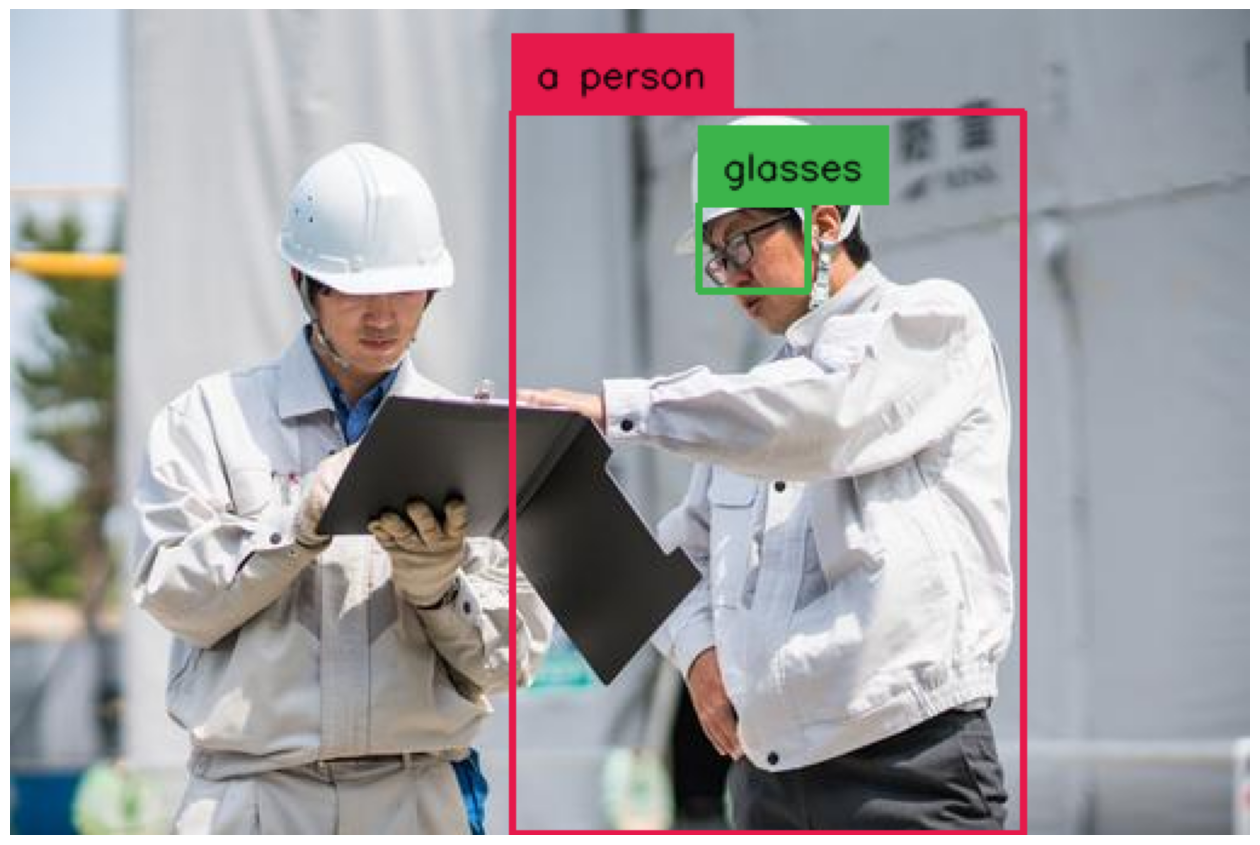

In [38]:
# @title 自然文を入力したときの検出例
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25
caption = "A person wearing glasses is pointing and giving instructions."

detections, labels = grounding_dino_model.predict_with_caption(
    image=image,
    caption=caption,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

# annotate image with detections
box_annotator = sv.BoxAnnotator()
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

## SAM

In [39]:
# @title SAMのインストール
%%bash

cd $HOME
python -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-xpfqrqrj
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=490fe4bf7d4c94aea14c004c5d6ce1c67f5818e9a21326796b370aa490c159f2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ugn3zfqa/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-xpfqrqrj


In [40]:
# @title モデルのダウンロード
%%bash

cd /content/weights
wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [41]:
import numpy as np
from segment_anything import sam_model_registry, SamPredictor

In [42]:
# @title モデル読み込み
SAM_CHECKPOINT_PATH = os.path.join("/content", "weights", "sam_vit_h_4b8939.pth")
print(SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(SAM_CHECKPOINT_PATH))

SAM_ENCODER_VERSION = "vit_h"

sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [43]:
# @title 推論に使用する関数
def segment(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)

In [44]:
# @title 検出したbboxに対するセグメンテーションの推論実行
detections.mask = segment(
    sam_predictor=sam_predictor,
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    xyxy=detections.xyxy
)

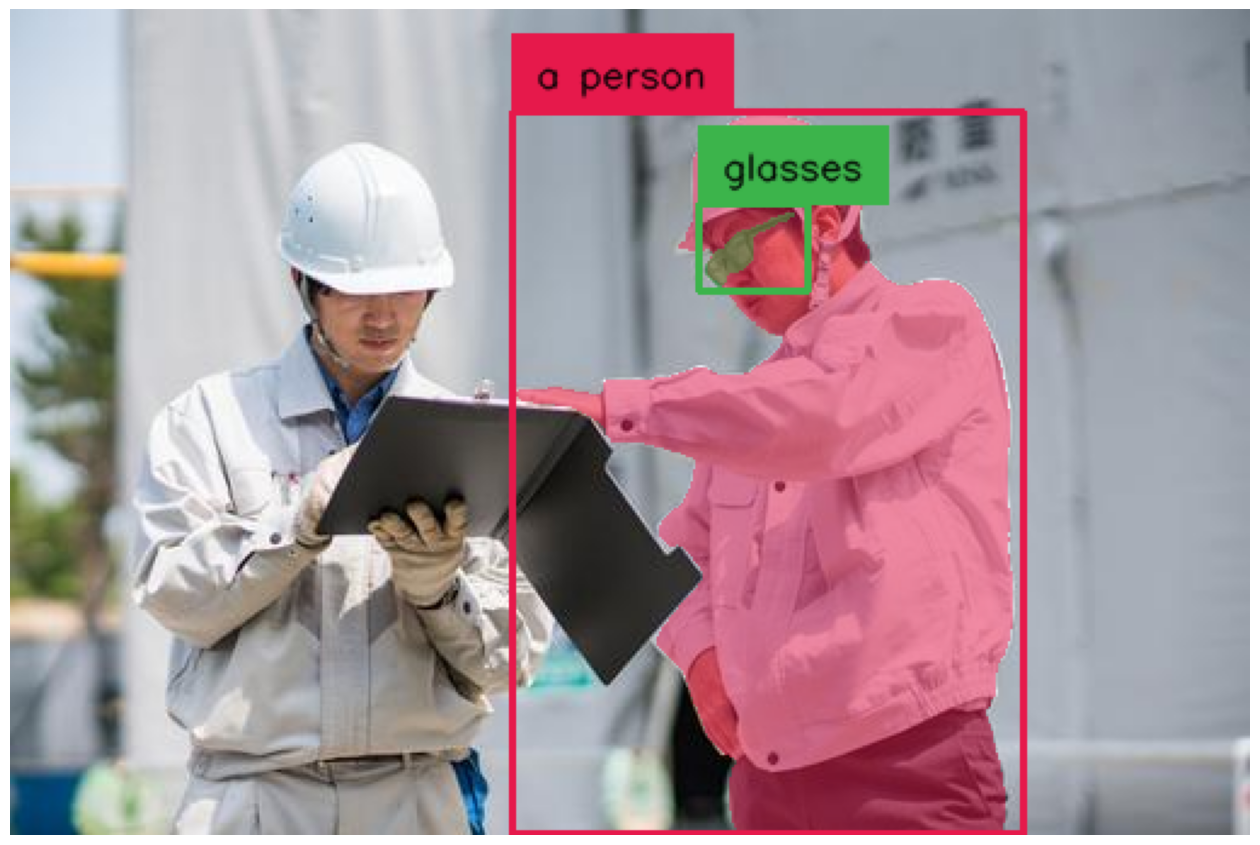

In [45]:
# @title セグメンテーションの結果を描画
box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()

annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_image, (16, 16))